In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

#this allows plots to appear directly in notebook 
%matplotlib inline

In [20]:
#read into DataFrame
data=pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
#shape of DataFrame
data.shape

(200, 4)

<Axes: xlabel='Newspaper', ylabel='Sales'>

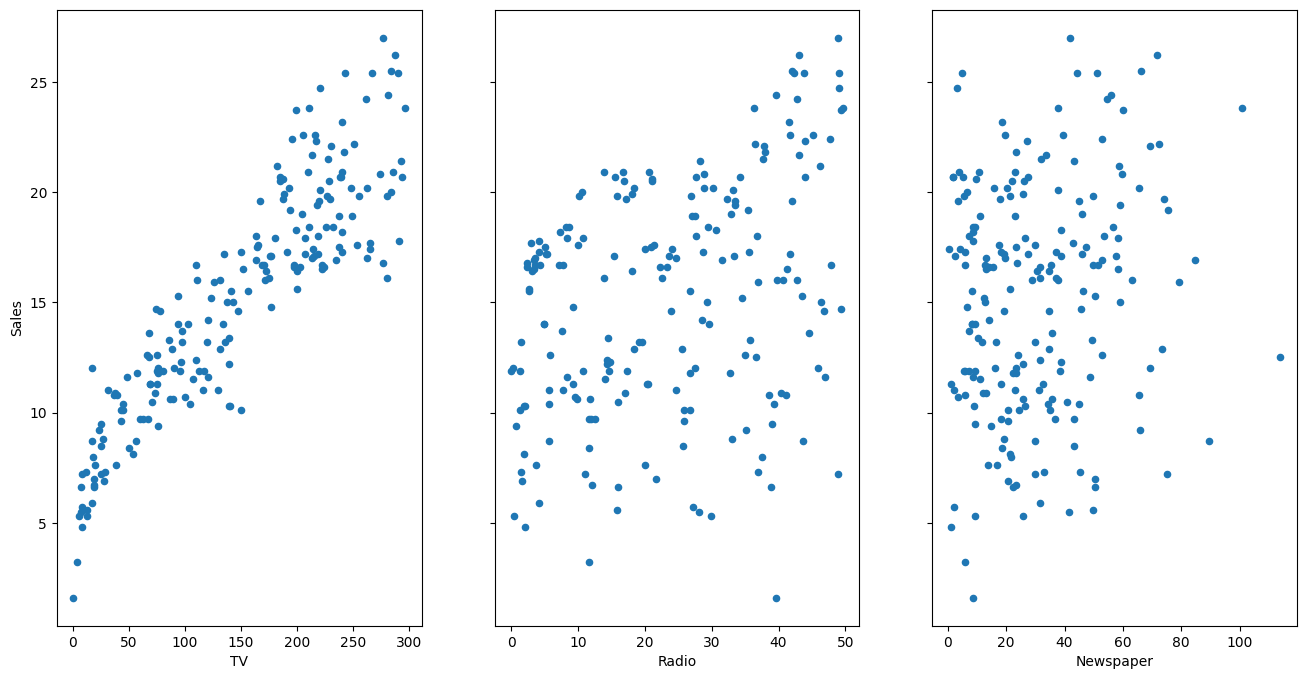

In [4]:
#visualising the relationship between features and response using scatterplots
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])

In [5]:
#creating x and y
feature_cols=['TV']
X=data[feature_cols]
y=data.Sales

#sklearn
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,y)

#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [6]:
#calculate the prediction
6.97482 + 0.055467*50

9.74817

In [7]:
#creating a DataFrame having
X_new=pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([9.74806001])

In [9]:
# create a DataFrame with the min and max values of TV
X_new=pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x values and store 
preds = lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

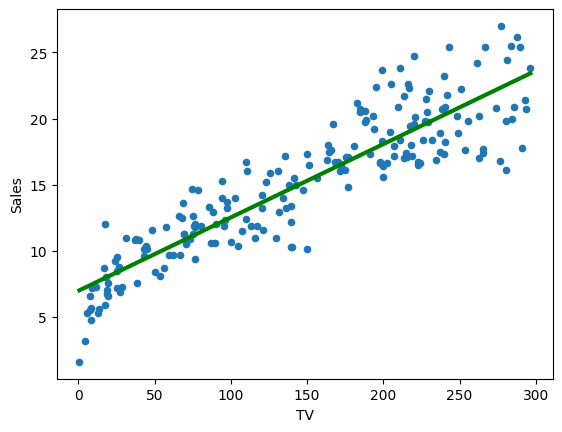

In [12]:
#plot the observed data
data.plot(kind='scatter',x='TV',y='Sales')

#plot the least squares line
plt.plot(X_new,preds,c='green',linewidth=3)

In [13]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Sales ~ TV',data=data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [14]:
#print r-squared value for model
lm.rsquared

0.8121757029987414

In [15]:
#print r-squared value for model
lm.rsquared

0.8121757029987414

In [16]:
#creating x and y for multi LinearRegression
feature_cols=['TV','Radio','Newspaper']
X=data[feature_cols]
y=data.Sales

lm=LinearRegression()
lm.fit(X,y)

#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [17]:
lm=smf.ols(formula='Sales ~ TV+Radio+Newspaper',data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           8.13e-99
Time:                        12:45:41   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.9025896186081139

In [19]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.9025912899684558